In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
from IPython.display import clear_output

In [2]:
rq1 = requests.get("https://deribit.com/api/v2/public/ticker?instrument_name=BTC-PERPETUAL").json()
rq2 = requests.get("https://deribit.com/api/v2/public/ticker?instrument_name=BTC-24JUN22").json()

In [3]:
bid_perp = rq1['result']['best_bid_price']
ask_perp = rq1['result']['best_ask_price']
bid_fut = rq2['result']['best_bid_price']
ask_fut = rq2['result']['best_ask_price']
ambid_perp = rq1['result']['best_bid_amount']
amask_perp = rq1['result']['best_ask_amount']
ambid_fut = rq2['result']['best_bid_amount']
amask_fut = rq2['result']['best_ask_amount']
timestamp = rq1['result']['timestamp']

In [4]:
timestamp_list = []
bid_perp_list = []
ask_perp_list = []
bid_fut_list = []
ask_fut_list = []
ambid_perp_list = []
amask_perp_list = []
ambid_fut_list = []
amask_fut_list = []

In [5]:
while True:
    clear_output(wait=True)
    rq1 = requests.get("https://deribit.com/api/v2/public/ticker?instrument_name=BTC-PERPETUAL").json()
    rq2 = requests.get("https://deribit.com/api/v2/public/ticker?instrument_name=BTC-24JUN22").json()
    bid_perp = rq1['result']['best_bid_price']
    ask_perp = rq1['result']['best_ask_price']
    bid_fut = rq2['result']['best_bid_price']
    ask_fut = rq2['result']['best_ask_price']
    ambid_perp = rq1['result']['best_bid_amount']
    amask_perp = rq1['result']['best_ask_amount']
    ambid_fut = rq2['result']['best_bid_amount']
    amask_fut = rq2['result']['best_ask_amount']
    timestamp = rq1['result']['timestamp']
    timestamp_list.append(timestamp)
    bid_perp_list.append(bid_perp)
    ask_perp_list.append(ask_perp)
    bid_fut_list.append(bid_fut)
    ask_fut_list.append(ask_fut)
    ambid_perp_list.append(ambid_perp)
    amask_perp_list.append(amask_perp)
    ambid_fut_list.append(ambid_fut)
    amask_fut_list.append(amask_fut)
    
    market_data = {"timestamp": timestamp_list,"bid_perp": bid_perp_list, "amountbid_perp": ambid_perp_list,
              "ask_perp": ask_perp_list, "amountask_perp": amask_perp_list,
              "bid_fut": bid_fut_list, "amountbid_fut": ambid_fut_list,
              "ask_fut": ask_fut_list, "amountask_fut": amask_fut_list}
    
    df = pd.DataFrame(market_data)
    df['spread_buy'] = (df['bid_fut']/df['bid_perp'] - 1)*100
    df['spread_sell'] = (df['ask_fut']/df['ask_perp'] - 1)*100
    
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(df['timestamp'], df['spread_buy'], 'g-')
    ax2.plot(df['timestamp'], df['spread_sell'], 'b-')

    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel('Spread_buy', color='g')
    ax2.set_ylabel('Spread_sell', color='b')

    plt.show()
    time.sleep(1)

ConnectionError: HTTPSConnectionPool(host='deribit.com', port=443): Max retries exceeded with url: /api/v2/public/ticker?instrument_name=BTC-PERPETUAL (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000002B273082848>: Failed to establish a new connection: [WinError 10060] Uma tentativa de conexão falhou porque o componente conectado não respondeu\r\ncorretamente após um período de tempo ou a conexão estabelecida falhou\r\nporque o host conectado não respondeu'))

In [7]:
df

df['spread_buyt'] = (df['ask_fut'] / df['bid_perp'] - 1)*100
df['spread_sellt'] = (df['bid_fut'] / df['ask_perp'] - 1)*100

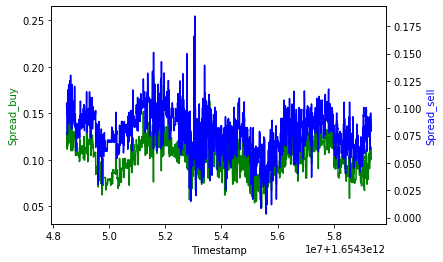

In [8]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['timestamp'], df['spread_buyt'], 'g-')
ax2.plot(df['timestamp'], df['spread_sellt'], 'b-')

ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Spread_buy', color='g')
ax2.set_ylabel('Spread_sell', color='b')

plt.show()

In [11]:
df.to_excel('deribit_data.xlsx')